In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re

categories = {
    "laptops": "computers",
    "tablets": "computers",
    "touch": "phones"
}

all_products = []

for category, base in categories.items():
    print(f"📦 Scraping: {category}")
    for page in range(1, 51):  # Up to 50 pages
        url = f"https://webscraper.io/test-sites/e-commerce/allinone/{base}/{category}?page={page}"
        response = requests.get(url)

        if response.status_code != 200:
            print(f"❌ Failed on page {page}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        cards = soup.select("div.thumbnail")

        if not cards:
            print(f"⚠️ No more products on page {page}")
            break

        for card in cards:
            try:
                name = card.select_one("a.title").text.strip()
                price = float(card.select_one(".price").text.strip().replace("$", ""))
                rating = int(card.select_one(".ratings p[data-rating]")["data-rating"])
                review_text = card.select_one("p.review-count.float-end").text
                reviews = int(re.sub(r"\D", "", review_text))

                all_products.append({
                    "Product Name": name,
                    "Price (USD)": price,
                    "Category": category,
                    "Rating": rating,
                    "Number of Reviews": reviews
                })
            except Exception as e:
                print(f"⚠️ Error: {e}")
                continue

        time.sleep(random.uniform(1, 2))  # polite scraping

df = pd.DataFrame(all_products)
df["Price (INR)"] = df["Price (USD)"] * 83
df.to_csv("products_raw.csv", index=False)

print(f"✅ Scraped {len(df)} products.")

📦 Scraping: laptops
📦 Scraping: tablets
📦 Scraping: touch
✅ Scraped 7350 products.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("products_raw.csv")

# Cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Normalize text
df["Category"] = df["Category"].str.title()
df["Product Name"] = df["Product Name"].str.title()


       Price (USD)      Rating  Number of Reviews    Price (INR)
count   147.000000  147.000000         147.000000     147.000000
mean    781.481497    2.374150           7.027211   64862.964218
std     454.622624    1.093009           4.210140   37733.677809
min      24.990000    1.000000           0.000000    2074.170000
25%     406.605000    1.000000           3.500000   33748.215000
50%     739.990000    2.000000           7.000000   61419.170000
75%    1183.440000    3.000000          10.000000   98225.520000
max    1799.000000    4.000000          14.000000  149317.000000
Category
Laptops    117
Tablets     21
Touch        9
Name: count, dtype: int64


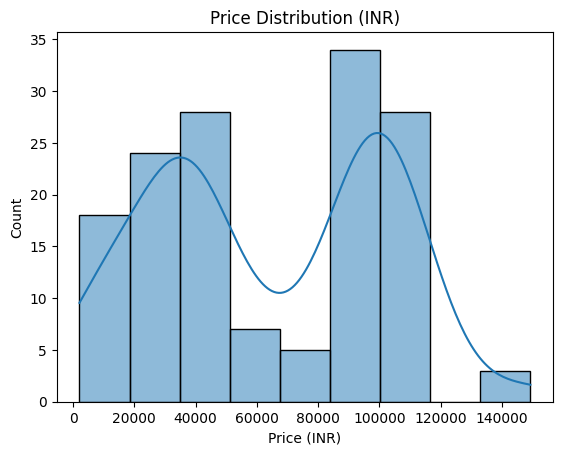

In [3]:
# EDA
print(df.describe())
print(df["Category"].value_counts())

# Visualizations
sns.histplot(df["Price (INR)"], kde=True)
plt.title("Price Distribution (INR)")
plt.show()

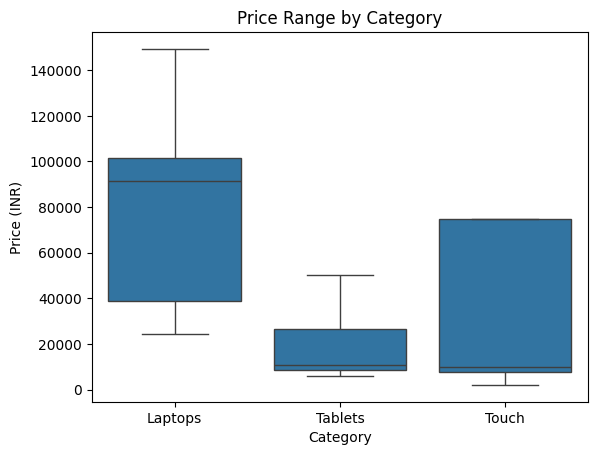

In [4]:
sns.boxplot(data=df, x="Category", y="Price (INR)")
plt.title("Price Range by Category")
plt.show()


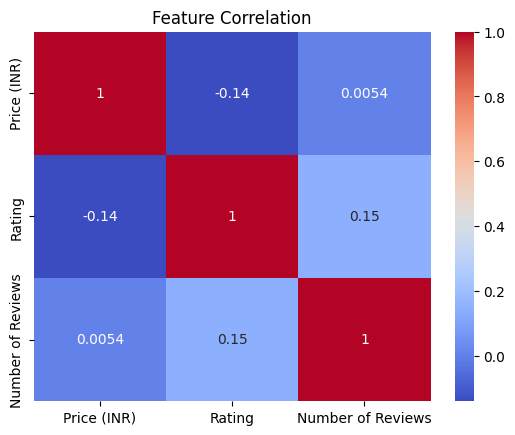

In [5]:
sns.heatmap(df[["Price (INR)", "Rating", "Number of Reviews"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

df.to_csv("products_cleaned.csv", index=False)

# Data Storage

In [6]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///ecommerce.db')
df.to_sql("products", con=engine, index=False, if_exists="replace")

# Test
pd.read_sql("SELECT * FROM products LIMIT 5", con=engine)


,Product Name,Price (USD),Category,Rating,Number of Reviews,Price (INR)
0,Asus Vivobook...,295.99,Laptops,3,14,24567.17
1,Prestigio Smar...,299.00,Laptops,2,8,24817.00
2,Prestigio Smar...,299.00,Laptops,4,12,24817.00
3,Aspire E1-510,306.99,Laptops,3,2,25480.17
4,Lenovo V110-15...,321.94,Laptops,3,5,26721.02


# Unsupervised Learning

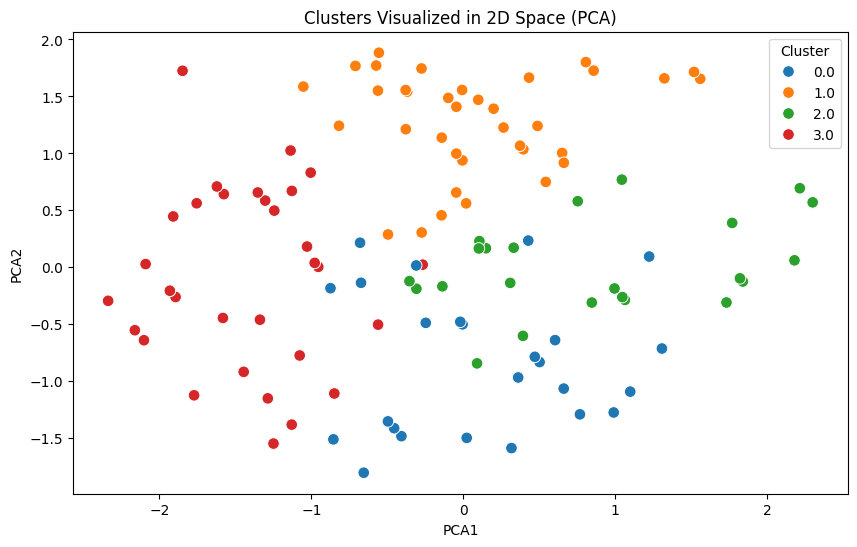

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df[["Price (INR)", "Rating", "Number of Reviews"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = df["Cluster"]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=70)
plt.title("Clusters Visualized in 2D Space (PCA)")
plt.show()


In [19]:
from sklearn.datasets import make_blobs

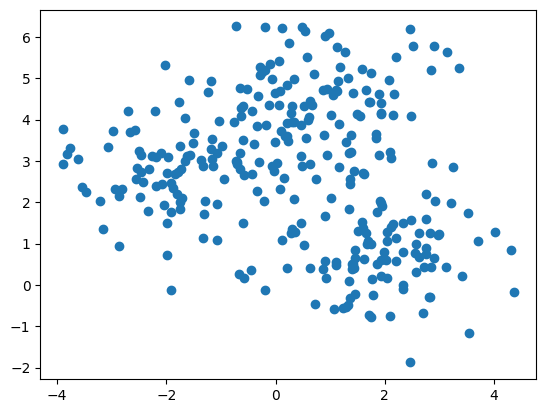

In [20]:
X, y = make_blobs(n_samples=300,random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
# Training Examples
X[:10]

array([[ 0.06344785,  5.42080362],
       [ 1.32967014, -0.4857003 ],
       [ 1.7373078 ,  4.42546234],
       [-1.61283478,  3.1121752 ],
       [-1.74644504,  1.83384564],
       [-1.51827611,  3.44488647],
       [ 0.02458305,  2.96215652],
       [-0.24916544,  5.1481503 ],
       [-2.48740839,  2.1247649 ],
       [ 0.21196866,  3.91227665]])

In [22]:
# Target variables (4 clusters)
y[:10]

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2])

In [23]:
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)

In [24]:
kmeans

KMeans(n_clusters=2, n_init=10, random_state=0)

In [25]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [26]:
kmeans.cluster_centers_

array([[-0.4329852 ,  3.69704353],
       [ 1.84672272,  0.86269995]])

In [27]:
kmeans.inertia_

1010.0503990300522

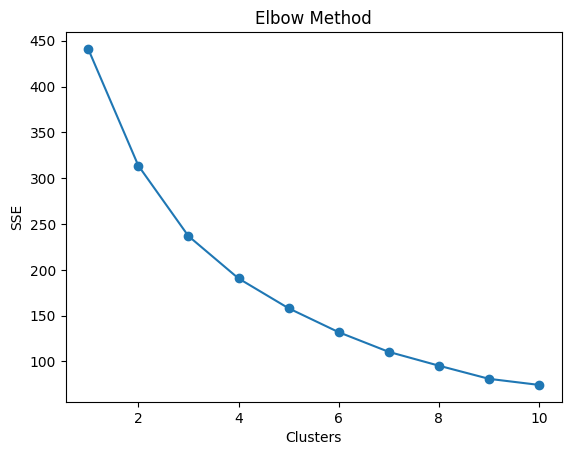

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = df[["Price (INR)", "Rating", "Number of Reviews"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method to find k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

# Final model
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.to_csv("products_clustered.csv", index=False)


Silhouette Score: 0.4841542003442777


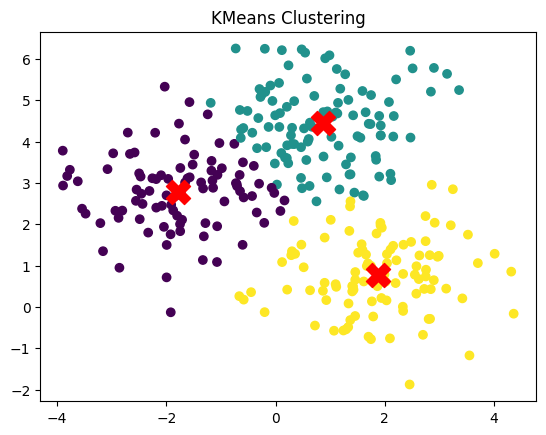

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, random_state=0)

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Compute silhouette score
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Optional: Plot clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("KMeans Clustering")
plt.show()


In [31]:
# Implement with 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [32]:
# Lets predict
pred_y = kmeans.fit_predict(X)

In [33]:
pred_y

array([1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1], d

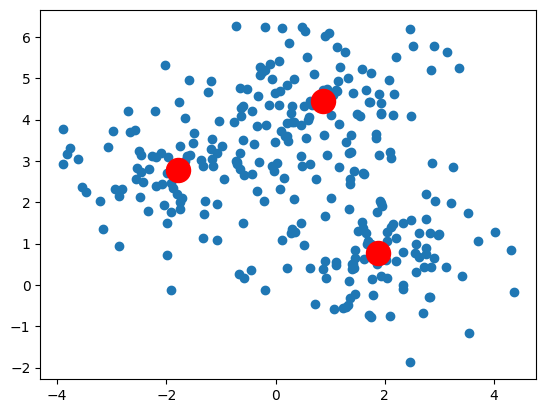

In [34]:
# Lets plot
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Hopkins Statistics

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [36]:
hopkins(pd.DataFrame(X))

np.float64(0.799348954770131)

# Visualize Clusters

# Supervised Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df[["Price (INR)", "Rating", "Number of Reviews"]]
y = df["Category"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.9
              precision    recall  f1-score   support

     Laptops       1.00      0.92      0.96        24
     Tablets       0.57      1.00      0.73         4
       Touch       1.00      0.50      0.67         2

    accuracy                           0.90        30
   macro avg       0.86      0.81      0.78        30
weighted avg       0.94      0.90      0.91        30



# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Score:", grid.best_score_)


✅ Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
✅ Best Score: 0.8803418803418803
